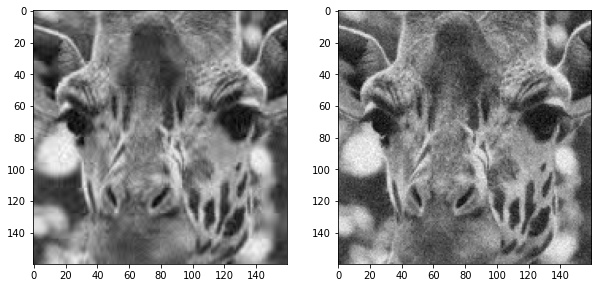

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from patchify import patchify, unpatchify


def dct(f):
    n = f.size
    c = np.zeros(n)
    c[0] = 1/np.sqrt(n)*np.sum(f)
    for k in range(1,n):
        c[k] = np.sqrt(2/n)*np.sum(f*np.cos(np.pi*k*(np.arange(n)+0.5)/n))
    return c

def idct(c):
    n = c.size
    f = np.zeros(n)
    for l in range(0,n):
        f[l] = np.sqrt(1/n)*c[0] + np.sqrt(2/n)*np.sum(c[1:n]*np.cos(np.pi*np.arange(1,n)*(l+0.5)/n))
    return f

def dct2(f):
    ny,nx = f.shape
    c = np.zeros([ny,nx])
    for s in range(ny):
        c[s,:] = dct(f[s,:])
    for t in range(nx):
        c[:,t] = dct(c[:,t])
    return c

def idct2(c):
    ny,nx = c.shape
    f = np.zeros([ny,nx])
    for s in range(ny):
        f[s,:] = idct(c[s,:])
    for t in range(nx):
        f[:,t] = idct(f[:,t])
    return f


def denoise_DCT(threshold, img):
    
    # Create Patches of size 16 x 16
    img_patch = patchify(img, [16,16])
    ny_block , nx_block , y_size_block, x_size_block = img_patch.shape

    img1 = 0 * np.copy(img_patch)
    for i in range (ny_block):
        for j in range(nx_block):
            img1[i,j]=dct2(img_patch[i,j])

    #Thresholding       
    img1[abs(img1)< threshold] = 0



    idct_result = 0 * np.copy(img_patch)
    for i in range (ny_block):
        for j in range(nx_block):
            idct_result[i,j]= idct2(img1[i,j])


    # Recreate Image from Patches
    img_denoised = unpatchify(idct_result, img.shape)

    return img_denoised

def main():
    
    # Load Image
    img_dir = "giraffe.jpg"
    img_pil = Image.open(img_dir).convert('L')
    img_nonoise = np.array(img_pil.resize([256,256]))/255
    img_nonoise = img_nonoise[50:210,50:210]

    # Add Noise
    st = 0.05
    gaussian = np.random.normal(0, st, (img_nonoise.shape[0],img_nonoise.shape[1])) 
    img = img_nonoise + gaussian
    
    # Plot Image With and Without Noise
    # plt.figure(figsize=(10,15))
    # sp1 = plt.subplot(121)
    # sp1.imshow(img_nonoise, 'gray')
    # sp2 = plt.subplot(122)
    # sp2.imshow(img, 'gray')
    # plt.show()
    
    threshold = st * 3
    img_denoised = denoise_DCT(threshold, img)
    
    # Plot
    plt.figure(figsize=(10,15))
    sp1 = plt.subplot(121)
    sp1.imshow(img_denoised, 'gray')
    sp1 = plt.subplot(122)
    sp1.imshow(img, 'gray')
    plt.show()


if __name__ == "__main__":
    main()

### DCT 
$$z_l^0 = \frac{1}{\sqrt{n}} \text{   und   } z_l^k = \sqrt{\frac{2}{n}} \cos{\pi k x_l}$$
mit folgendem Sampling:
$$x_l= \frac{l+0.5}{n},\text{   mit   } l \in \{0,1,...,n-1 \}$$

### Implementieren der DCT Komponente Z als Matrix.

- Zeilen - Samplingpunkte - l
- Spalten - Funktionen - k

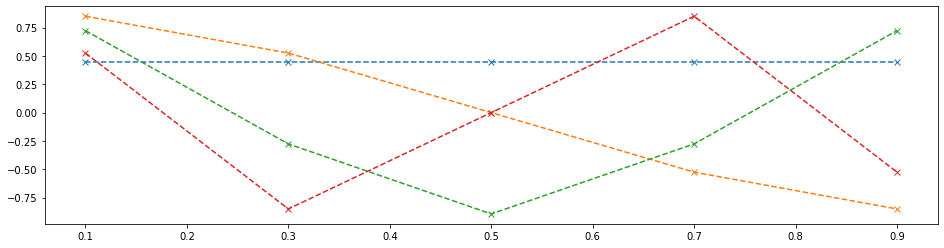

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
x = (np.arange(n)+ 0.5) /n
z0 = 1/ np.sqrt(n) * np.ones(n)
z1 = 2/np.sqrt(n) * np.cos(np.pi * 1 * x)
z2 = 2/np.sqrt(n) * np.cos(np.pi * 2 * x)
z3 = 2/np.sqrt(n) * np.cos(np.pi * 3 * x)
plt.figure(figsize=(16,4))
plt.plot(x,z0, "x--")
plt.plot(x,z1,"x--")
plt.plot(x,z2,"x--")
plt.plot(x,z3,"x--")
plt.show()

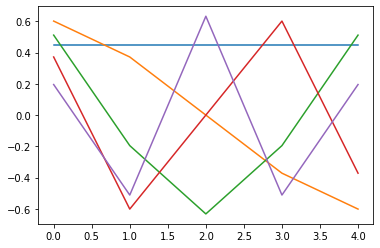

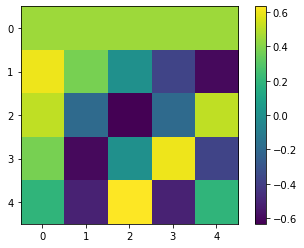

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Anzahl der Samplingstellen 
n = 5

# Abtaststellen
x = (np.arange(n) + 0.5) / n

# Matrix Z
Z = np.zeros([n,n])
Z[0,:] = np.ones(n) / np.sqrt(n)
plt.plot(Z[0,:])
for k in range(1,n):
    Z[k,:] = np.sqrt(2 / n) * np.cos( np.pi * k * x)
    plt.plot(Z[k,:])
plt.show()
plt.imshow(Z)
plt.colorbar()
plt.show()

### Matrix Komponente sind Orthonormal

In [2]:
print(np.round(Z@Z.T))
norm = np.sqrt(np.sum(Z[1,:]**2))
print(norm)

[[ 1.  0. -0.  0. -0.]
 [ 0.  1. -0. -0.  0.]
 [-0. -0.  1.  0. -0.]
 [ 0. -0.  0.  1.  0.]
 [-0.  0. -0.  0.  1.]]
0.9999999999999999


### Anwenden und Vergleich mit Scipy DCT

In [5]:
from scipy.fftpack import dct as dct_scipy

dct = lambda f: Z@f
idct = lambda f: Z.T@f

f = np.random.rand(n)
c = dct(f)
dct_ergebnis_scipy = dct_scipy(f, norm="ortho")

print(c)
print(dct_ergebnis_scipy)



[ 1.15966537  0.29067199  0.12631183  0.26074685 -0.51519122]
[ 1.15966537  0.29067199  0.12631183  0.26074685 -0.51519122]


### 2D Visualisierung

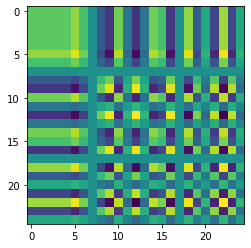

In [4]:
twod = np.outer(Z,Z)
plt.imshow(twod)
plt.show()